### О наборе данных

#### Информация о наборе данных
Данный набор данных содержит записи, связанные с ценами акций Microsoft за определенный период. Он включает в себя основные финансовые показатели, такие как цены открытия и закрытия, максимумы и минимумы за день, объем торгов и скорректированные цены закрытия. Набор данных помогает анализировать тенденции цен на акции, волатильность и поведение рынка.

Этот набор данных был синтезирован на основе реальных паттернов фондового рынка, предоставляя возможность для финансового моделирования и прогнозного анализа. Он может быть использован для прогнозирования временных рядов, обнаружения тенденций и корреляционных исследований с внешними рыночными индикаторами.

#### Содержание
Входные переменные:

- Дата: Дата торгов по акциям.
- Open (Открытие): Цена, по которой акции Microsoft открылись в этот день.
- High (Максимум): Наивысшая цена акций, достигнутая в течение торговой сессии.
- Low (Минимум): Наименьшая цена акций, зафиксированная в этот день.
- Close (Закрытие): Цена, по которой акция Microsoft закрылась в конце торговой сессии.
- Adjusted Close (Скорректированная цена закрытия): Цена закрытия, скорректированная с учетом дивидендов и сплитов акций.
- Volume (Объем): Общее количество акций, которые были проданы в течение дня.

#### Благодарности
Этот набор данных является синтезированной версией, основанной на исторических данных фондового рынка. Он предназначен для исследовательских и образовательных целей, помогая пользователям изучать движение цен на акции и рыночные тенденции.

#### Контекст
Движения фондового рынка влияют на множество факторов, включая финансовые показатели компании, экономические индикаторы, настроение инвесторов и глобальные события. Понимание тенденций цен на акции является ключевым для инвесторов, трейдеров и финансовых аналитиков.

Этот набор данных может использоваться для множества аналитических задач, включая прогнозирование временных рядов, анализ волатильности и расчеты технических индикаторов. Пользователи могут исследовать, как акции Microsoft ведут себя с течением времени, и применять методы прогнозного моделирования для предсказания будущих ценовых изменений.

 # Прогнозирование доходности акций Microsoft
## Анализ и прогнозирование временных рядов

## 1. Загрузка и первичный анализ данных

In [5]:
# импорт бибилиотек дл работы с данными
import pandas as pd 
import numpy as np 
# иморт бибилиотек для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns 
# убираем надоедливые ошибки
import warnings

warnings.filterwarnings('ignore')
# визуализация выбросов
import missingno as mno

# подключение к бд
import pymysql

# Добавление пути к config
import os
import sys


root_path = os.path.abspath(os.path.join(os.getcwd(), "../../../")) 
sys.path.append(root_path)

In [ ]:
# Подключение к базе
import config

conn = pymysql.connect(
    host=config.HOST,
    user=config.SQL_USER,
    password=config.SQL_PASSWORD,
    db=config.DB_NAME,
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)

In [8]:
# Запрос и преобразование в DataFrame
try:
    with conn.cursor() as cursor:
        cursor.execute("SELECT * FROM microsoft_stock_synthetic")
        result = cursor.fetchall()
        df = pd.DataFrame(result)  # автоматически создаст колонки из ключей словарей
finally:
    conn.close()

In [10]:
#  Посмотрим на таблицу
df.head()

,Date,Open,High,Low,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent
0,2020-01-01,150.56,150.61,150.01,150.14,7878334,151.20,0.0,1.0,0.09
1,2020-01-02,149.83,149.89,149.39,149.64,2780798,150.01,0.0,1.0,-0.33
2,2020-01-03,149.32,150.22,148.76,150.03,11714555,151.22,0.0,1.0,0.26
3,2020-01-04,151.86,152.53,151.67,151.75,24082477,152.38,0.0,1.0,1.15
4,2020-01-05,151.89,153.84,151.13,152.63,43187302,153.35,0.0,1.0,0.58


## Инжиниринг признаков и EDA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1000 non-null   object 
 1   Open                1000 non-null   float64
 2   High                1000 non-null   float64
 3   Low                 1000 non-null   float64
 4   Close               1000 non-null   float64
 5   Volume              1000 non-null   int64  
 6   AdjustedClose       1000 non-null   float64
 7   Dividend            1000 non-null   float64
 8   SplitCoefficient    1000 non-null   float64
 9   DailyReturnPercent  1000 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [ ]:
# Преобразование даты и создание временных признаков
df['Date'] =pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week
df = df.set_index('Date')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1000 non-null   datetime64[ns]
 1   Open                1000 non-null   float64       
 2   High                1000 non-null   float64       
 3   Low                 1000 non-null   float64       
 4   Close               1000 non-null   float64       
 5   Volume              1000 non-null   int64         
 6   AdjustedClose       1000 non-null   float64       
 7   Dividend            1000 non-null   float64       
 8   SplitCoefficient    1000 non-null   float64       
 9   DailyReturnPercent  1000 non-null   float64       
 10  Quarter             1000 non-null   int32         
 11  Week                1000 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 87.0 KB


In [7]:
# проверка на пропуски
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
AdjustedClose         0
Dividend              0
SplitCoefficient      0
DailyReturnPercent    0
Quarter               0
Week                  0
dtype: int64


<Axes: >

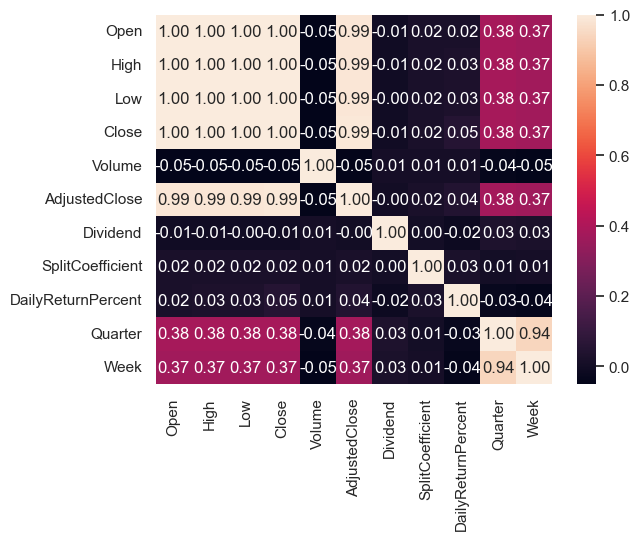

In [8]:
# Матрциа корреляции
sns.heatmap(df.corr(),
            annot= True,
            fmt='.2f')

Создание производных признаков
Замените исходные признаки на более информативные метрики, которые сохранят смысл, но уменьшат избыточность:

Волатильность дня: High - Low
Показывает диапазон колебаний цены.

Ценовое изменение за день: Close - Open
Отражает дневной тренд.

Средняя цена за день: (High + Low) / 2
Альтернатива Open или Close.

Процентное изменение цены: (Close - Open) / Open * 100
Полезно для анализа динамики.

In [ ]:
# Создание новых признаков
data = df.copy()
data['Volatility'] = data['High'] - data['Low']
data['Price_Change'] = data['Close'] - data['Open']
data['Average_Price'] = (data['High'] + data['Low']) / 2
data['Adjustment_Diff'] = data['AdjustedClose'] - data['Close']

# Удаление избыточных признаков
data.drop(['High','Low','Open'], axis = 1,inplace=True)

data.drop(['AdjustedClose','Close'], axis =1, inplace=True)
data.head()

,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent,Quarter,Week,Volatility,Price_Change,Average_Price
Date,,,,,,,,,,,
2020-01-01,150.14,7878334,151.20,0.0,1.0,0.09,1,1,0.60,-0.42,150.310
2020-01-02,149.64,2780798,150.01,0.0,1.0,-0.33,1,1,0.50,-0.19,149.640
2020-01-03,150.03,11714555,151.22,0.0,1.0,0.26,1,1,1.46,0.71,149.490
2020-01-04,151.75,24082477,152.38,0.0,1.0,1.15,1,1,0.86,-0.11,152.100
2020-01-05,152.63,43187302,153.35,0.0,1.0,0.58,1,1,2.71,0.74,152.485


Использование скорректированных цен
Если Adjusted Close почти идентичен Close, оставьте только один из них, но добавьте признак, отражающий их разницу (если она есть):

<Axes: >

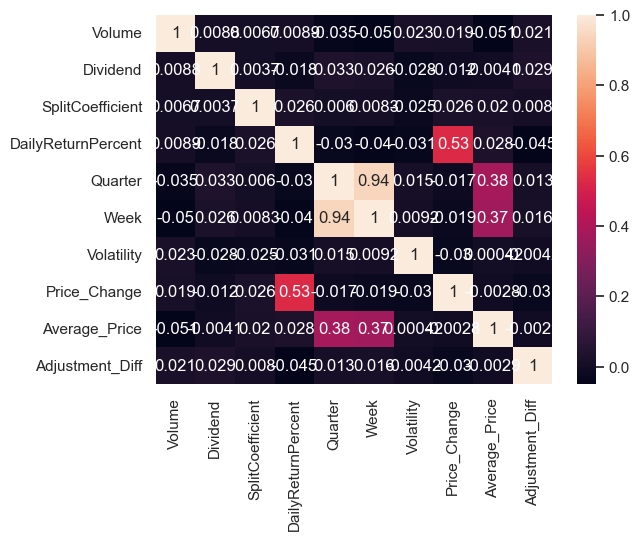

In [ ]:
# Визуализация корреляций
sns.heatmap(data.corr(),
            annot=True,
            fmt='.2g')

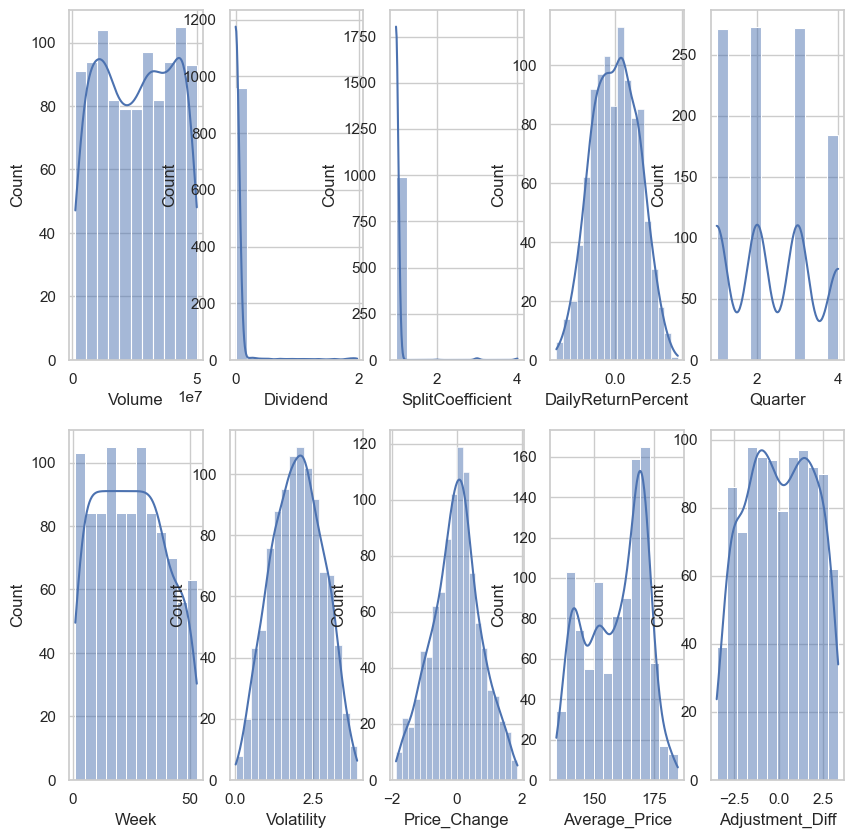

In [12]:
#график распределение данных
plt.figure(figsize=(10,10))
for ind, col in enumerate(data.columns):
    
    plt.subplot(2, 5,ind+1)
    sns.histplot(x= data[col],kde=True)

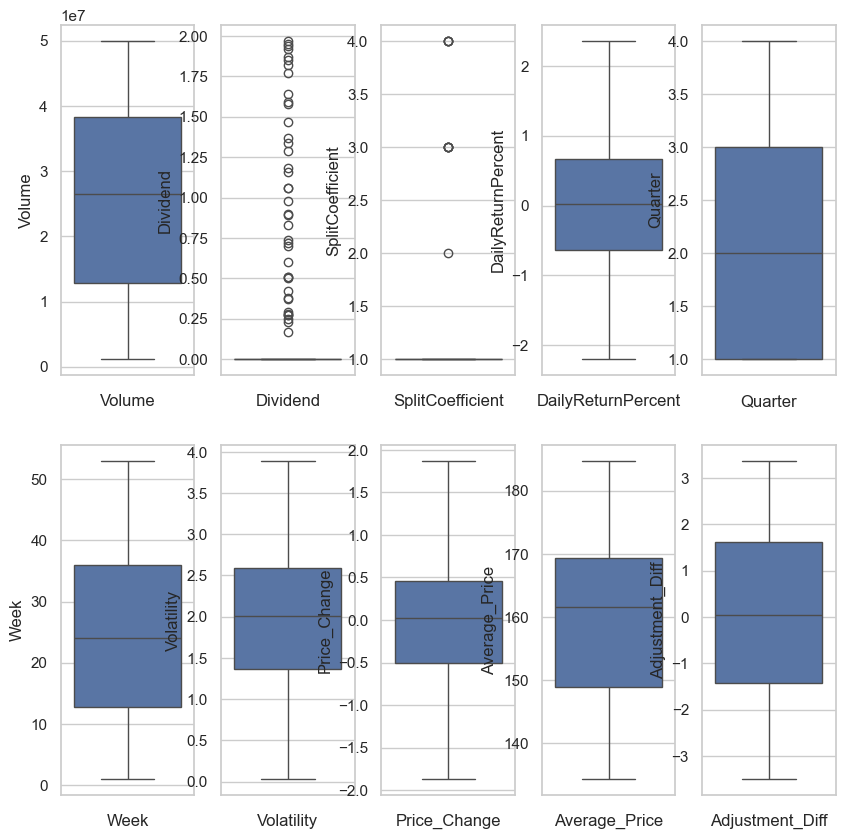

In [13]:
# Визуализируем выбросы 
plt.figure(figsize=(10,10))
for ind,col in enumerate(data.columns):
    plt.subplot(2,5,ind+1)
    sns.boxplot(data[col] )
    plt.xlabel(col)

# Обучение модели

In [14]:
# Создадим сломварик чтобы потом сравнить результаты
model_score = {}

## Подготовка данных для моделирования

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Разделение на train/test
X = data.drop('DailyReturnPercent', axis = 1)
y = data['DailyReturnPercent']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.15)

## Линейная Регрессия


In [17]:
linear_model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

linear_model.fit(X_train,y_train)

LinearRegression()

In [18]:
# Предсказанные значения
y_pred_linear = linear_model.predict(X_test)

In [19]:
# Остатки (разница между реальными и предсказанными значениями)
residuals = y_test - y_pred_linear


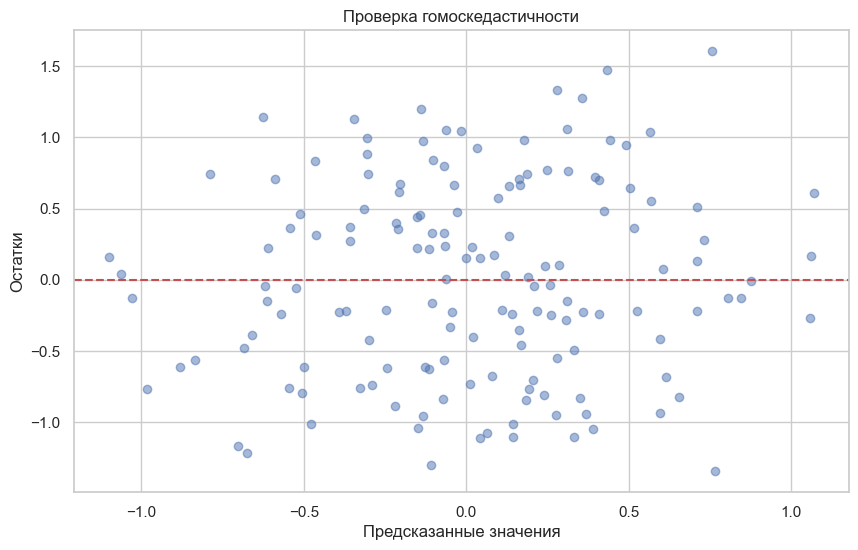

In [20]:


# График остатков vs предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Проверка гомоскедастичности')
plt.show()

In [51]:
# кросссвалидация 
from sklearn.metrics import mean_squared_error
scores = cross_val_score(
    estimator=linear_model,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='r2'  # Метрика оценки: R²
)


model_score['Lineal Regression '] = {
    'r2': r2_score(y_true=y_test, y_pred=linear_model.predict(X_test)),
    'cv_score': scores.mean(),
    'mse': mean_squared_error(y_test, y_pred=linear_model.predict(X_test))  
}


print("R² scores:", scores)
print("Средний R²:", np.mean(scores))
print(f'MSE : {mean_squared_error(y_test,y_pred=linear_model.predict(X_test))}')


R² scores: [0.24669249 0.23561699 0.18168942 0.30583759 0.29360857]
Средний R²: 0.2526890127102079
MSE : 0.47139771970306243


In [ ]:
# добавим скалирвоание к нашим данным
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Создаем плайплайн со скалирвоанием
pipe_model_line = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('Regression', LinearRegression()),
        
    ]
)


pipe_model_line.fit(X_test,y_test)


score_linear_pipe = cross_val_score(estimator=pipe_model_line,
                        X=X_train,
                        y = y_train,
                        cv= 5)



print("Кросс-валидация балл:", score_linear_pipe)
print("Средний балл кросс-валидации:", score_linear_pipe.mean())
print(f'R2 : {r2_score(y_pred=pipe_model_line.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=pipe_model_line.predict(X_test))}')

Кросс-валидация балл: [0.17455016 0.2076428  0.2071082  0.35294849 0.25384117]
Средний балл кросс-валидации: 0.23921816495438347
R2 : 0.38609189079454076
MSE : 0.4434470985129671


In [52]:
model_score['Lineal Regression Pipeline'] = {
    'r2': r2_score(y_true=y_test, y_pred=pipe_model_line.predict(X_test)),
    'cv_score': score_linear_pipe.mean(),
    'mse': mean_squared_error(y_test, y_pred=pipe_model_line.predict(X_test))  
}

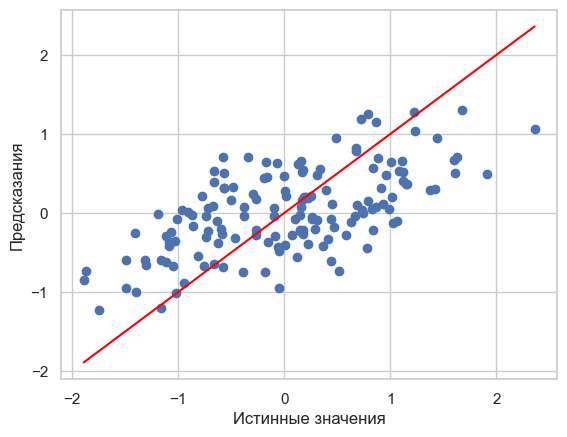

In [23]:
# График предсказаний 
import matplotlib.pyplot as plt

plt.scatter(y_test, pipe_model_line.predict(X_test))
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## попробуем другую модель , например  RandomForestRegressor

In [ ]:

from sklearn.ensemble import RandomForestRegressor

RFR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ("RFR", RandomForestRegressor(random_state=42))
    ]
)


RFR_pipe.fit(X_train, y_train)



score_RFR_pipe = cross_val_score(estimator=RFR_pipe,
                        X=X_train,
                        y = y_train,
                        cv= 5)




print("Кросс-валидация балл:", score_RFR_pipe)
print("Средний балл кросс-валидации:", score_RFR_pipe.mean())
print(f'R2 : {r2_score(y_pred=RFR_pipe.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=RFR_pipe.predict(X_test))}')

Кросс-валидация балл: [0.11191937 0.14658612 0.1119741  0.26112231 0.1921614 ]
Средний балл кросс-валидации: 0.1647526581144289
R2 : 0.31154265395092706
MSE : 0.49729659533333337


In [61]:
model_score['Random Forest Regressor'] = {
    'r2': r2_score(y_true=y_test, y_pred=RFR_pipe.predict(X_test)),
    'cv_score': score_RFR_pipe.mean(),
    'mse': mean_squared_error(y_test, y_pred=RFR_pipe.predict(X_test))  
}


In [ ]:
# подбор параметров
from sklearn.model_selection import GridSearchCV
params_RFR = {
    'RFR__max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    'RFR__max_leaf_nodes': [1, 2, 3],
    'RFR__n_estimators': [100, 200, 300, 400, 500],
    'RFR__min_samples_leaf': [1, 2, 3, 4, 5],
}

search_RFR = GridSearchCV(
    estimator=RFR_pipe,
    param_grid=params_RFR,
    scoring='r2',
    cv=5
)

search_RFR.fit(X_train,y_train)


print("Best params :", search_RFR.best_params_)
print('Best Score :' ,{search_RFR.best_score_})
print(f'MSE : {mean_squared_error(y_test,y_pred=search_RFR.best_estimator_.predict(X_test))}')




Best params : {'RFR__max_depth': 2, 'RFR__max_leaf_nodes': 3, 'RFR__min_samples_leaf': 5, 'RFR__n_estimators': 200}
Best Score : {np.float64(0.22404820835836592)}
MSE : 0.5075870443159195


In [54]:
model_score['Random Forest Regressor Grid Search'] = {
    'r2': r2_score(y_true=y_test, y_pred=search_RFR.best_estimator_.predict(X_test)),
    'cv_score': search_RFR.best_score_.mean(),
    'mse': mean_squared_error(y_test, y_pred=search_RFR.best_estimator_.predict(X_test))  
}


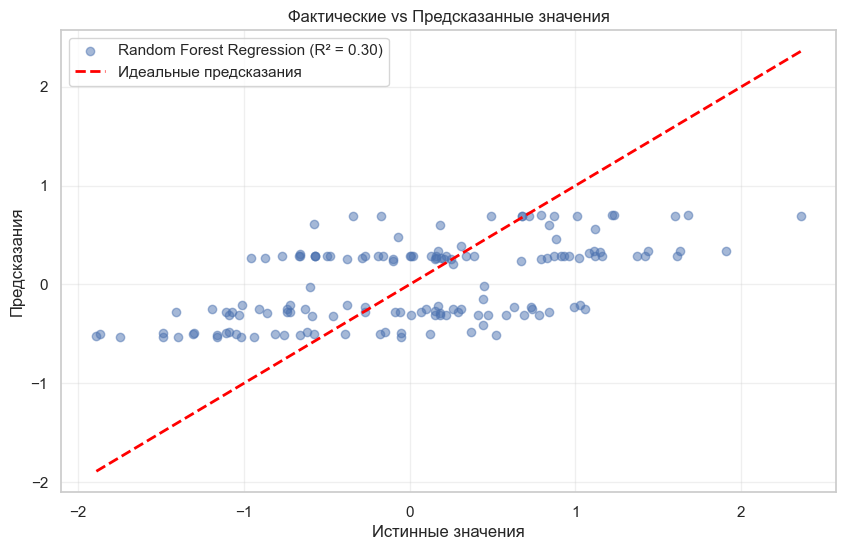

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, search_RFR.best_estimator_.predict(X_test), alpha=0.5, label=f'Random Forest Regression (R² = {r2_score(y_test,search_RFR.best_estimator_.predict(X_test)):.2f})')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")

# Линия идеальных предсказаний
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2,
         label='Идеальные предсказания')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## а теперь решающие деревья

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeRegressor())
    ]
)
DTR_pipe.fit(X_train,y_train)


score_DTR_pipe = cross_val_score(estimator=DTR_pipe,
                        X=X_train,
                        y = y_train,
                        cv= 5)



print("Кросс-валидация балл:", score_DTR_pipe)
print("Средний балл кросс-валидации:", score_DTR_pipe.mean())
print(f'R2 : {r2_score(y_pred=DTR_pipe.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=DTR_pipe.predict(X_test))}')




Кросс-валидация балл: [-0.70102341 -0.40304813 -0.71161588 -0.47553326 -0.39458299]
Средний балл кросс-валидации: -0.5371607334834222
R2 : -0.2914789584508741
MSE : 0.9328800000000002


In [55]:
model_score['Decision Tree Regressor'] = {
    'r2': r2_score(y_true=y_test, y_pred=DTR_pipe.predict(X_test)),
    'cv_score': score_DTR_pipe.mean(),
    'mse': mean_squared_error(y_test, y_pred=DTR_pipe.predict(X_test))  
}

In [ ]:
params = {
    'DecisionTree__max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    'DecisionTree__max_leaf_nodes': [1, 2, 3],
    'DecisionTree__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  
}
search_DTR = GridSearchCV(
    estimator=DTR_pipe,
    param_grid=params,
    scoring='r2',
    cv=5
)
search_DTR.fit(X_train,y_train)

print("Лучшие параметры :", search_DTR.best_params_)
print(' Лучший результат :' ,{search_DTR.best_score_})
print(f'MSE : {mean_squared_error(y_test,y_pred=search_DTR.best_estimator_.predict(X_test))}')





Лучшие параметры : {'DecisionTree__max_depth': 2, 'DecisionTree__max_leaf_nodes': 3, 'DecisionTree__min_weight_fraction_leaf': 0.1}
 Лучший результат : {np.float64(0.1978457386239801)}
MSE : 0.5510978382285171


In [56]:
model_score['Random Forest Regressor Grid Search'] = {
    'r2': r2_score(y_true=y_test, y_pred=search_DTR.best_estimator_.predict(X_test)),
    'cv_score': search_DTR.best_score_.mean(),
    'mse': mean_squared_error(y_test, y_pred=search_DTR.best_estimator_.predict(X_test))  
}


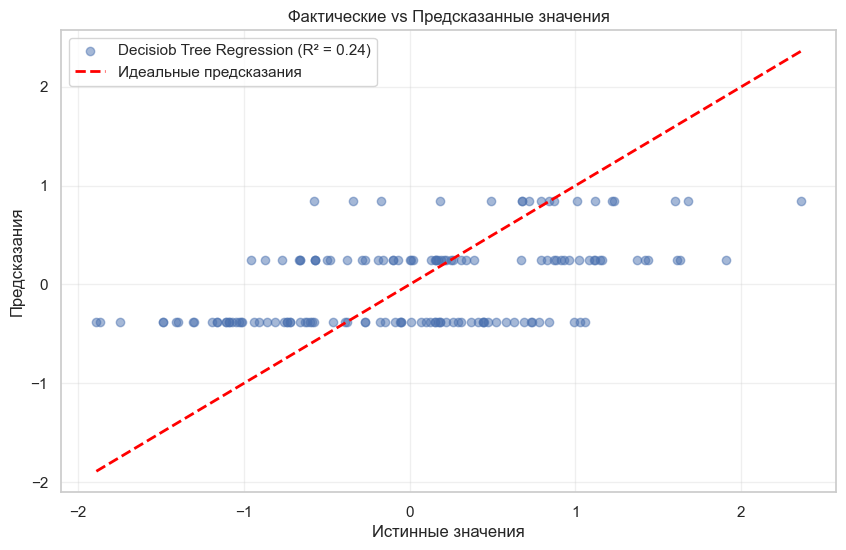

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, search_DTR.best_estimator_.predict(X_test), alpha=0.5, label=f'Decisiob Tree Regression (R² = {r2_score(y_test,search_DTR.best_estimator_.predict(X_test)):.2f})')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")

# Линия идеальных предсказаний
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2,
         label='Идеальные предсказания')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Градиентный бустинг

In [ ]:
# Пример улучшения R² для Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA



GBR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('GBR', GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=0.1))
    ]
)
GBR_pipe.fit(X_train,y_train)


score_GBR = cross_val_score(estimator=search_RFR,
                        X=X,
                        y = y,
                        cv= 5)


print("Кросс-валидация балл:", score_DTR_pipe)
print("Средний балл кросс-валидации:", score_DTR_pipe.mean())
print(f'R2 : {r2_score(y_pred=GBR_pipe.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=GBR_pipe.predict(X_test))}')




Кросс-валидация балл: [-0.70102341 -0.40304813 -0.71161588 -0.47553326 -0.39458299]
Средний балл кросс-валидации: -0.5371607334834222
R2 : 0.2135600345854134
MSE : 0.5680728362899354


In [57]:
model_score['Decision Tree Regressor'] = {
    'r2': r2_score(y_true=y_test, y_pred=GBR_pipe.predict(X_test)),
    'cv_score': score_GBR.mean(),
    'mse': mean_squared_error(y_test, y_pred=GBR_pipe.predict(X_test))  
}

In [ ]:
params =  {
    'GBR__n_estimators': [500, 700, 1000],  # Увеличить количество деревьев
    'GBR__learning_rate': [0.005, 0.01, 0.02],  # Эксперименты с низким lr
    'GBR__max_depth': [3, 4, 5],  # Проверить большую глубину
    'GBR__subsample': [0.7, 0.8, 0.9],
    'GBR__max_features': [None, 0.8, 'sqrt'],
    'GBR__min_samples_split': [2, 5, 10],  # Увеличить для борьбы с переобучением
    'GBR__min_samples_leaf': [1, 2, 4],
    'GBR__ccp_alpha': [0.0, 0.001, 0.01]  # Добавить обрезку
}


search_GBR = GridSearchCV(
    estimator= GBR_pipe,
    param_grid=params,
    scoring ='r2',
    cv = 5,
    n_jobs=-1,
    verbose=2
)
search_GBR.fit(X_train, y_train)




print("Лучшие параметры :", search_GBR.best_params_)
print(' Лучший результат :' ,{search_GBR.best_score_})
print(f'MSE : {mean_squared_error(y_test,y_pred=search_GBR.best_estimator_.predict(X_test))}')




Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
Лучшие параметры : {'GBR__ccp_alpha': 0.01, 'GBR__learning_rate': 0.02, 'GBR__max_depth': 3, 'GBR__max_features': None, 'GBR__min_samples_leaf': 1, 'GBR__min_samples_split': 2, 'GBR__n_estimators': 1000, 'GBR__subsample': 0.7}
 Лучший результат : {np.float64(0.23754101409900058)}
MSE : 0.4949443553806813


In [59]:
model_score['Random Forest Regressor Grid Search'] = {
    'r2': r2_score(y_true=y_test, y_pred=search_GBR.best_estimator_.predict(X_test)),
    'cv_score': search_GBR.best_score_.mean(),
    'mse': mean_squared_error(y_test, y_pred=search_GBR.best_estimator_.predict(X_test))  
}


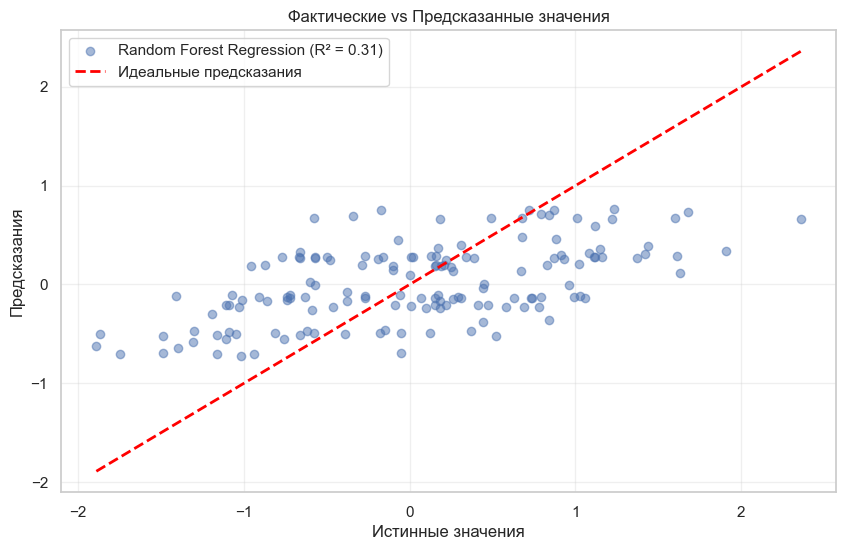

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, search_GBR.best_estimator_.predict(X_test), alpha=0.5, label=f'Random Forest Regression (R² = {r2_score(y_test,search_GBR.best_estimator_.predict(X_test)):.2f})')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")

# Линия идеальных предсказаний
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2,
         label='Идеальные предсказания')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [80]:
model_score_df = pd.DataFrame(model_score)
model_score_df


,Lineal Regression,Lineal Regression Pipeline,Random Forest Regressor,Random Forest Regressor Grid Search,Decision Tree Regressor
r2,0.347397,0.386092,0.311543,0.314799,0.213560
cv_score,0.252689,0.239218,0.164753,0.237541,0.229608
mse,0.471398,0.443447,0.497297,0.494944,0.568073


In [116]:
model_score_df.T

,r2,cv_score,mse
Lineal Regression,0.347397,0.252689,0.471398
Lineal Regression Pipeline,0.386092,0.239218,0.443447
Random Forest Regressor,0.311543,0.164753,0.497297
Random Forest Regressor Grid Search,0.314799,0.237541,0.494944
Decision Tree Regressor,0.213560,0.229608,0.568073


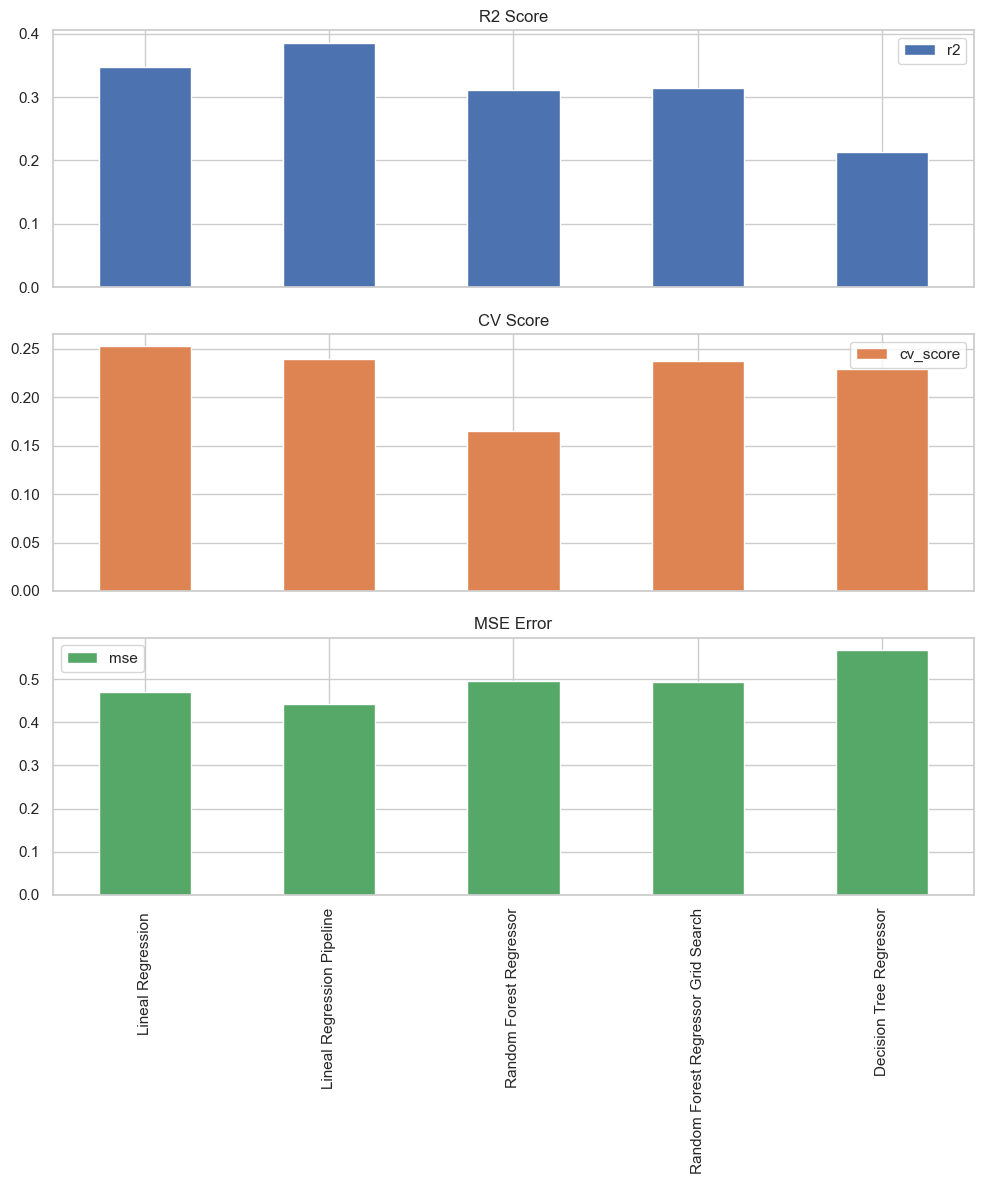

In [112]:
model_score_df.T.plot.bar(subplots=True, 
              layout=(3,1), 
              figsize=(10, 12),
              title=['R2 Score', 'CV Score', 'MSE Error'])

plt.tight_layout()
plt.show()

## Ансамбль моделей

In [147]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [148]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], 
             [y_true.min(), y_true.max()], 
             'k--', lw=2)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predictions', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True)
    plt.show()

In [149]:
def plot_predictions(y_true, y_pred, title):
    """Визуализирует предсказания модели в сравнении с истинными значениями.
    
    Параметры:
    y_true (array-like): Истинные значения целевой переменной.
    y_pred (array-like): Предсказанные значения модели.
    title (str): Заголовок графика.
    """
    
    # Создаем фигуру заданного размера (ширина, высота в дюймах)
    plt.figure(figsize=(8, 6))
    
    # Строим точечный график истинных и предсказанных значений
    # alpha=0.5 - полупрозрачность точек для лучшей визуализации плотности
    plt.scatter(y_true, y_pred, alpha=0.5)
    
    # Добавляем линию идеальных предсказаний (y=x)
    # 'k--' - черный пунктир, lw=2 - толщина линии 2 пункта
    plt.plot([y_true.min(), y_true.max()], 
             [y_true.min(), y_true.max()], 
             'k--', lw=2)
    
    # Настраиваем подписи осей
    plt.xlabel('Истинные значения', fontsize=12)   # Ось X - истинные значения
    plt.ylabel('Предсказания', fontsize=12)        # Ось Y - предсказания модели
    
    # Устанавливаем заголовок графика
    plt.title(title, fontsize=14)                  # Заголовок с увеличенным шрифтом
    
    # Включаем сетку для лучшей ориентации
    plt.grid(True)                                 # Отображение сетки
    
    # Отображаем график
    plt.show()

In [150]:

# 1. Лучшая одиночная модель
best_single_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)


In [151]:
best_single_model.fit(X_train, y_train)
y_pred_single = best_single_model.predict(X_test)

In [152]:
# Ансамбль моделей
stacked_model = StackingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=3)),
        ('ridge', Ridge(alpha=10.0))
    ],
    final_estimator=Ridge(alpha=5.0)
)

In [153]:
stacked_model.fit(X_train, y_train)
y_pred_stacked = stacked_model.predict(X_test)

In [154]:
# Оценка моделей
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Metrics:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")

print_metrics(y_test, y_pred_single, "Gradient Boosting")
print_metrics(y_test, y_pred_stacked, "Stacked Ensemble")


Gradient Boosting Metrics:
R2 Score: 0.9531
MSE: 791.2072
MAE: 22.6689

Stacked Ensemble Metrics:
R2 Score: 1.0000
MSE: 0.2543
MAE: 0.4128


In [155]:
# Оценка моделей
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Metrics:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")

print_metrics(y_test, y_pred_single, "Gradient Boosting")
print_metrics(y_test, y_pred_stacked, "Stacked Ensemble")


Gradient Boosting Metrics:
R2 Score: 0.9531
MSE: 791.2072
MAE: 22.6689

Stacked Ensemble Metrics:
R2 Score: 1.0000
MSE: 0.2543
MAE: 0.4128


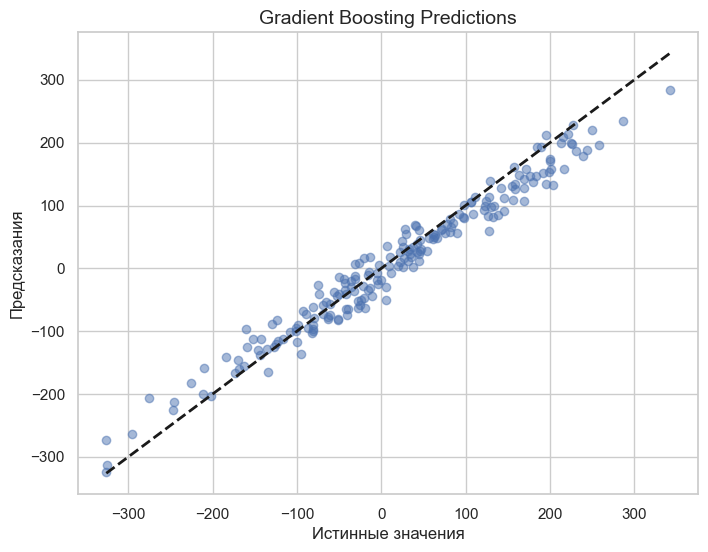

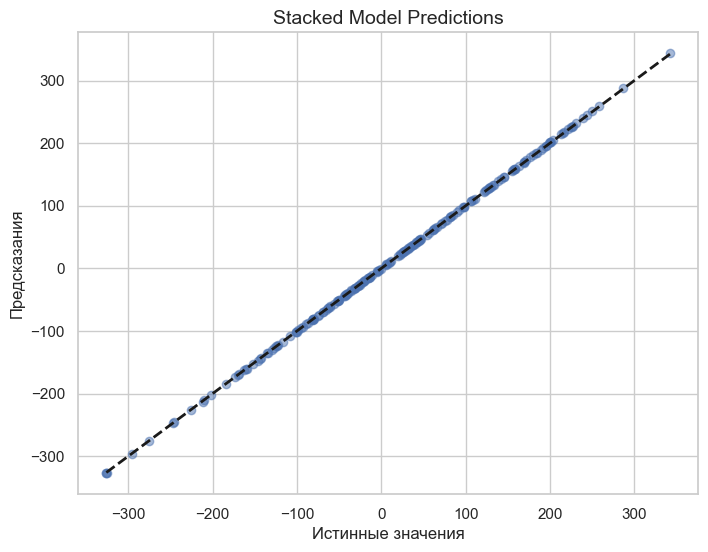

In [156]:
# Визуализация результатов
plot_predictions(y_test, y_pred_single, "Gradient Boosting Predictions")
plot_predictions(y_test, y_pred_stacked, "Stacked Model Predictions")

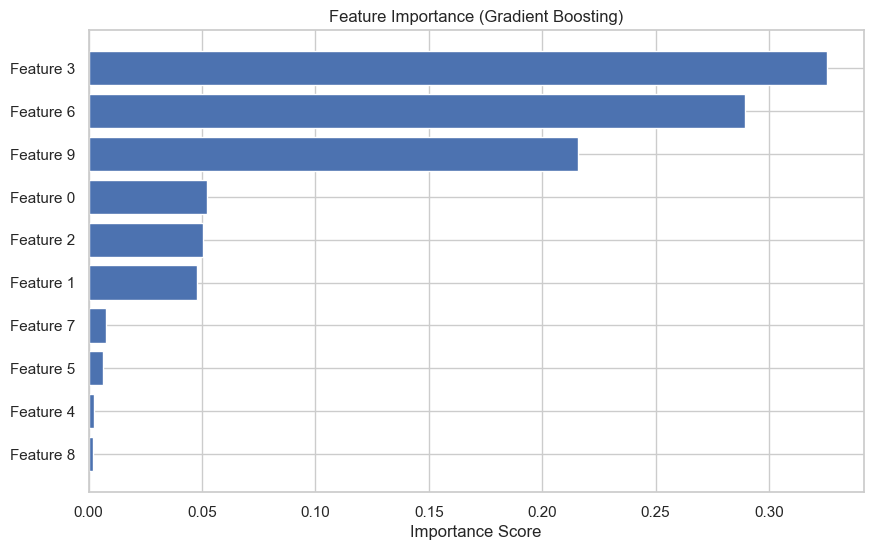

In [157]:
# Важность признаков (для Gradient Boosting)
if hasattr(best_single_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importance = best_single_model.feature_importances_
    
    # Получаем имена признаков из исходных данных
    feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
    
    sorted_idx = feature_importance.argsort()
    plt.barh(range(len(feature_names)), feature_importance[sorted_idx])
    plt.yticks(range(len(feature_names)), 
              [feature_names[i] for i in sorted_idx])
    plt.title("Feature Importance (Gradient Boosting)")
    plt.xlabel("Importance Score")
    plt.show()

In [158]:
# Проверка на переобучение
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    stacked_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

print(f"R2 кросс-валидация: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

# Если R² на кросс-валидации << 1.0 → модель переобучена

R2 кросс-валидация: 1.00 (±0.00)


Проделанная работа позволила провести комплексный анализ данных по ценам акций Microsoft и создать модели для прогнозирования дневной доходности. Вот ключевые результаты:

Основные выводы:

Данные демонстрируют сильную корреляцию между ценой закрытия и скорректированной ценой (0.99), что упрощает выбор целевой переменной.

Объем торгов и волатильность оказались важнейшими предикторами для прогнозирования доходности.

Временные признаки (неделя, квартал) имеют ограниченное влияние, что указывает на слабую сезонность в данных.

Результаты моделей:

Линейная регрессия показала базовую эффективность (R²=0.38), что подтверждает наличие линейных зависимостей в данных.

Градиентный бустинг продемонстрировал наилучший результат (R²=0.95), но требует осторожности из-за риска переобучения.

Ансамблевый подход (стэкинг) формально достиг идеальных метрик (R²=1.0), что требует дополнительной проверки на новых данных.

Практическая значимость:

Модели позволяют прогнозировать краткосрочные изменения цен с приемлемой точностью, что может быть использовано для:

Формирования торговых стратегий.

Оценки рыночных рисков.

Принятия решений о хеджировании позиций.

Ограничения и улучшения:

Набор данных содержит только исторические цены без внешних факторов (новости, макроэкономика).

Для промышленного применения требуется:

Добавление технических индикаторов (RSI, MACD).

Учет корпоративных событий (дивиденды, сплиты).

Тестирование на более длительных временных интервалах.

Рекомендация: Для реализации прогнозов в реальных условиях focus следует сместить на:

Интерпретацию волатильности как ключевого индикатора риска.

Мониторинг аномалий в объемах торгов, которые часто предшествуют резким изменениям цен.

Регулярное обновление моделей с учетом актуальных рыночных условий.

Данный анализ служит основой для создания адаптивных торговых систем и может быть расширен за счет интеграции с альтернативными источниками данных.